In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

### 4. Сравнение оценок. Эффективные оценки. Задача 1.
Условие: Сгенерируйте $M = 100$ выборок $X_1, \ldots, X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1, \ldots, X_n$ для всех $n \leq 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\cdot\overline{X}, (n+1) X_{(1)}, X_{(1)} + X_{(n)}, \frac{(n + 1)}{n} X_{(n)}$. Посчитайте для всех полученных оценок $\hat{\theta}$ квадратичную функцию потерь $(\hat{\theta} - \theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потреь в зависимости от $n$.

#### Результаты теоретической задачи 1 задания №2"Свойства оценок".
##### $2\cdot\overline{X}$ - несмещенная состоятельная оценка.
#####  $(n+1) X_{(1)}$ - несмещенная несостоятельная оценка.
#####  $X_{(1)} + X_{(n)}$ - несмещенная состоятельная оценка.
#####  $\frac{(n + 1)} {n} X_{(n)}$ - несмещенная состоятельная оценка.

#### Результаты теоретической задачи 1 задания №4"Сравнение оценок. Эффективные оценки".
##### Функция риска для оценки:
##### $2\cdot\overline{X}$ равна  $\frac{\theta^2}{3n}$
#####  $(n+1) X_{(1)}$  равна  $\frac{n\theta^2}{n + 2}$
#####  $\frac{(n + 1)} {n} X_{(n)}$ равна  $\frac{\theta^2}{n(n+2)}$
#####  $\frac{\theta^2}{n(n+2)} \leq \frac{\theta^2}{3n} \leq \frac{n\theta^2}{n + 2}$ -- отсюда следует, что оценка $\frac{(n + 1)} {n} X_{(n)}$ наилучшая.

In [2]:
#заданные константы
M = 100  # кол-во выборок
N = 1000 # размер выборок
n = np.arange(1, N+1, dtype=int) 

In [3]:
#функция вычисления оценок
def Loss_function(theta, lim_1, lim_2):
    #для усреднения функций потерь
    R1 = np.zeros(N)
    R2 = np.zeros(N)
    R3 = np.zeros(N)
    R4 = np.zeros(N)
    
    for k in range(M):
        #сгенерируем выборки
        sample = sps.uniform.rvs(size = N, loc = 0, scale = theta)

        #вычислим оценки
        #оценка: 2<X>
        estimation_1 = [np.average(sample[:n]) * 2 for n in range(1, N+1)] 
        #оценка: (n + 1) * X_1
        estimation_2 = [np.min(sample[:n]) * (n + 1) for n in range(1, N+1)] 
        #оценка: X_1 + X_n
        estimation_3 = [np.min(sample[:n]) + np.max(sample[:n]) for n in range(1, N+1)] 
        #оценка: X_n *(n + 1) / n
        estimation_4 = [((n + 1) / n) * np.max(sample[:n]) for n in range(1, N+1)]

        #вычислим функции потерь и усредним по всем выборкам     
        R1 += (estimation_1 - theta*np.ones(N))**2
        R2 += (estimation_2 - theta*np.ones(N))**2
        R3 += (estimation_3 - theta*np.ones(N))**2
        R4 += (estimation_4 - theta*np.ones(N))**2
    
    R1 /= M
    R2 /= M
    R3 /= M
    R4 /= M

    #строим графики 
    plt.figure(figsize = (15, 10))
    plt.plot(n, R1, label=r'$2 \overline{X}$')
    plt.plot(n, R2, label=r'$(n+1) X_{(1)}$')
    plt.plot(n, R3, label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, R4, label=r'$\frac{(n + 1)} {n} X_{(n)}$')
    plt.xlabel(r'$n$', fontsize = 18) 
    plt.ylabel(r'$(\hat{\theta} - \theta)^2$', fontsize = 18)
    plt.legend(fontsize=15, loc=1)
    plt.ylim(0, lim_1) 
    plt.grid()
    plt.show() 
    
    plt.figure(figsize = (15, 10))
    plt.plot(n, R1, label=r'$2 \overline{X}$')
    plt.plot(n, R3, label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, R4, label=r'$\frac{(n + 1)} {n} X_{(n)}$')
    plt.xlabel(r'$n$', fontsize = 18) 
    plt.ylabel(r'$(\hat{\theta} - \theta)^2$', fontsize = 18)
    plt.legend(fontsize=15, loc=1)
    plt.ylim(0, lim_2) 
    plt.grid()
    plt.show() 
    
    return

Построим графики для значения $\theta = 1$.

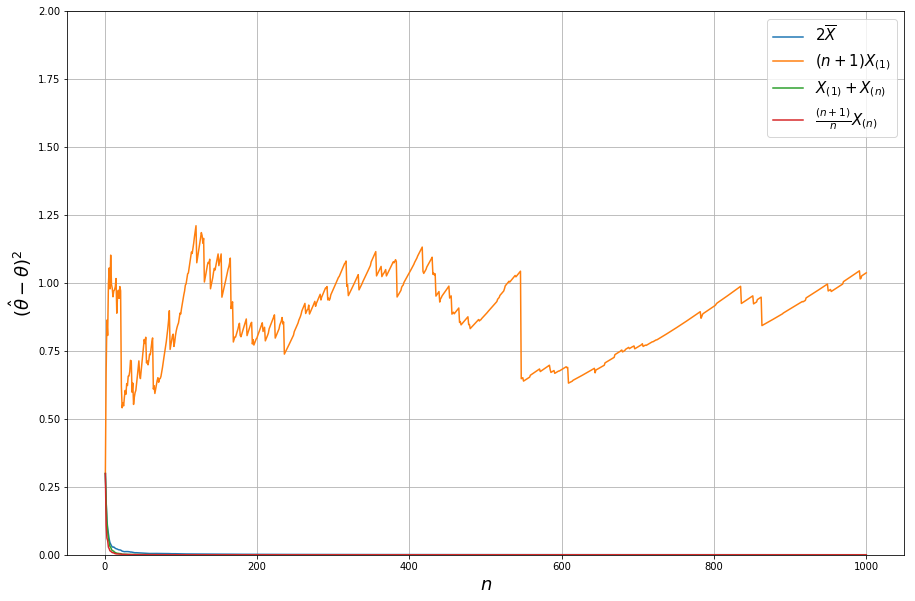

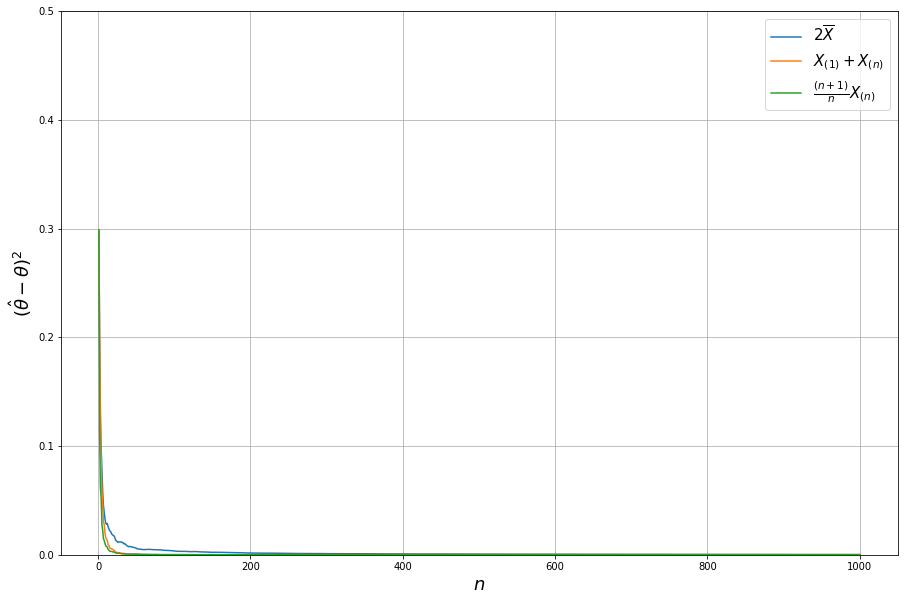

In [9]:
Loss_function(1, 2, 0.5)

Построим графики для значения $\theta = 10$.

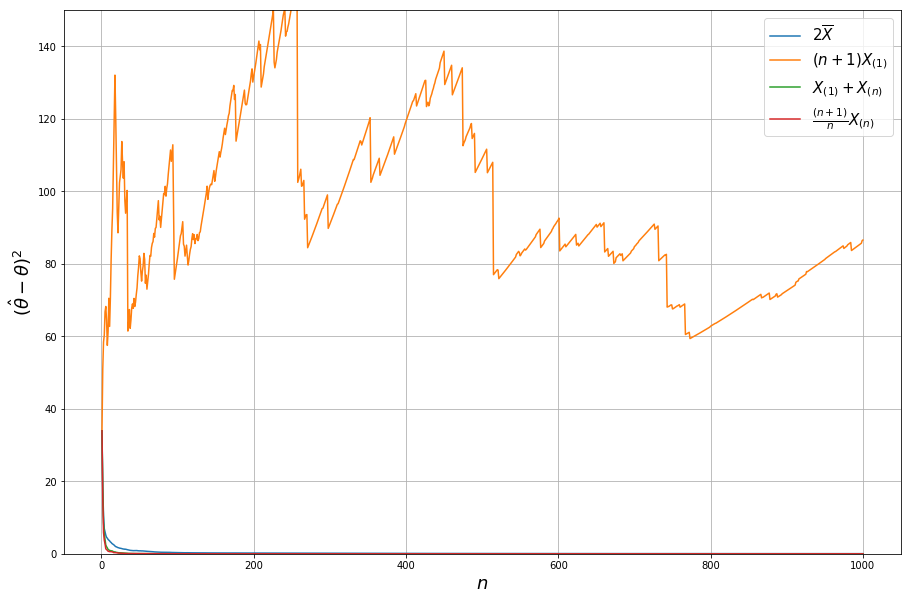

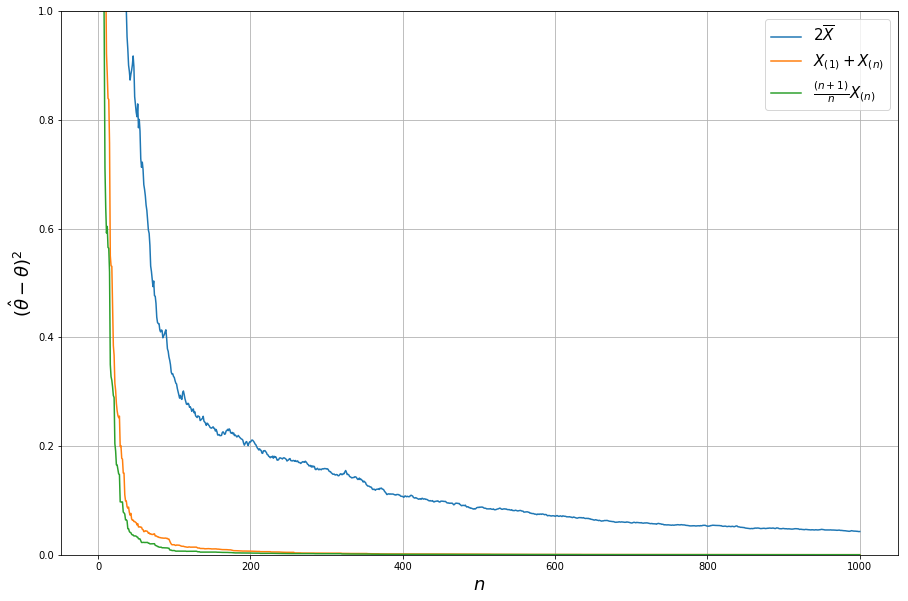

In [5]:
Loss_function(10, 150, 1) # theta = 10

Построим графики для значения $\theta = 100$.

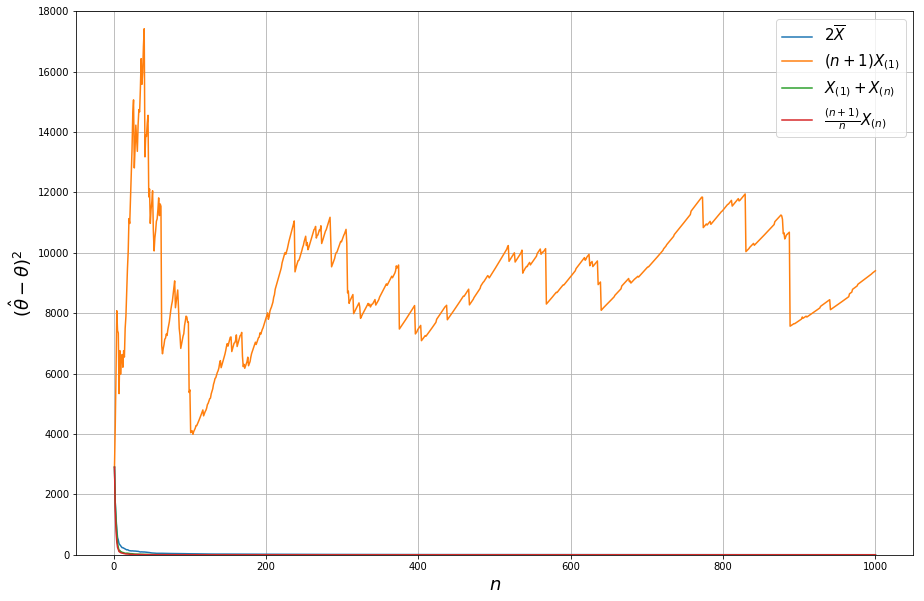

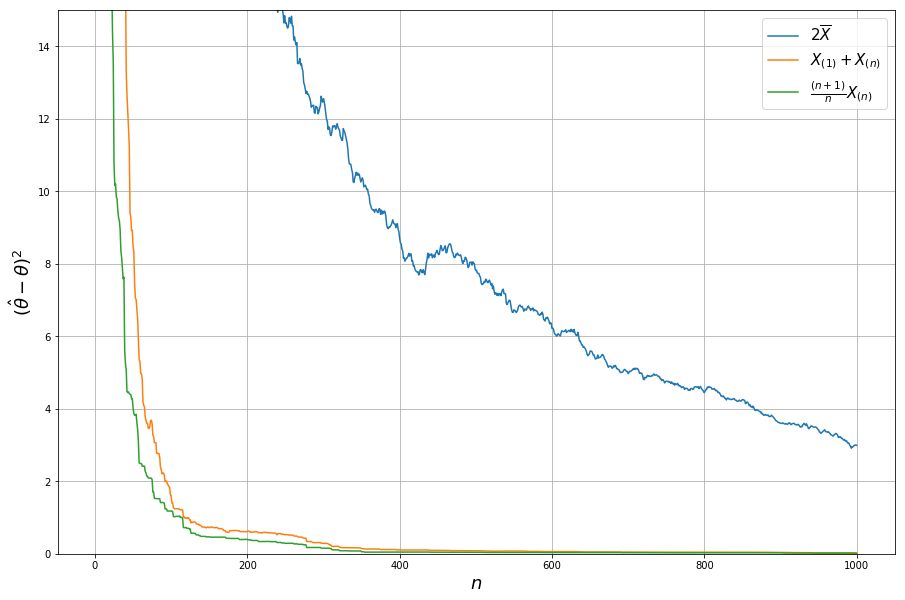

In [6]:
Loss_function(100, 18000, 15) # theta = 100

# Вывод:

1) Из графиков видно, что наибольшая функция потерь получается при использовании оценки $(n+1) X_{(1)}$. <br>
2) Наилучшей оценкой является $\frac{(n + 1)} {n} X_{(n)}$, что согласуется с полученными теоретически данными. <br>
3) Величина функции потерь увеличивается с увеличением значения $\theta$.